In [ ]:
from scipy.io import arff
import pandas as pd

# Load the dataset
file_path = '/content/vote.arff'  # Path to the uploaded dataset
data = arff.loadarff(file_path)
df = pd.DataFrame(data[0])

# Display basic information about the dataset
df_info = {
    "Shape": df.shape,
    "Column Names": df.columns.tolist(),
    "First Few Rows": df.head(),
    "Data Types": df.dtypes,
    "Missing Values": df.isnull().sum()
}

df_info


{'Shape': (435, 17),
 'Column Names': ['handicapped-infants',
  'water-project-cost-sharing',
  'adoption-of-the-budget-resolution',
  'physician-fee-freeze',
  'el-salvador-aid',
  'religious-groups-in-schools',
  'anti-satellite-test-ban',
  'aid-to-nicaraguan-contras',
  'mx-missile',
  'immigration',
  'synfuels-corporation-cutback',
  'education-spending',
  'superfund-right-to-sue',
  'crime',
  'duty-free-exports',
  'export-administration-act-south-africa',
  'Class'],
 'First Few Rows':   handicapped-infants water-project-cost-sharing  \
 0                b'n'                       b'y'   
 1                b'n'                       b'y'   
 2                b'?'                       b'y'   
 3                b'n'                       b'y'   
 4                b'y'                       b'y'   
 
   adoption-of-the-budget-resolution physician-fee-freeze el-salvador-aid  \
 0                              b'n'                 b'y'            b'y'   
 1                        

In [ ]:
import numpy as np

# Decode byte strings to regular strings and replace '?' with NaN
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)
df.replace('?', np.nan, inplace=True)

# Check the updated dataset for missing values
missing_values_summary = df.isnull().sum()

# Display first few rows of the preprocessed dataset
preprocessed_sample = df.head()

missing_values_summary, preprocessed_sample


<ipython-input-2-d90d6300fd28>:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)


(handicapped-infants                        12
 water-project-cost-sharing                 48
 adoption-of-the-budget-resolution          11
 physician-fee-freeze                       11
 el-salvador-aid                            15
 religious-groups-in-schools                11
 anti-satellite-test-ban                    14
 aid-to-nicaraguan-contras                  15
 mx-missile                                 22
 immigration                                 7
 synfuels-corporation-cutback               21
 education-spending                         31
 superfund-right-to-sue                     25
 crime                                      17
 duty-free-exports                          28
 export-administration-act-south-africa    104
 Class                                       0
 dtype: int64,
   handicapped-infants water-project-cost-sharing  \
 0                   n                          y   
 1                   n                          y   
 2                 NaN     

In [ ]:
# Handle missing values
# Impute categorical columns with the mode (most frequent value)
categorical_columns = df.columns[df.dtypes == 'object']
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify that there are no more missing values
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation


<ipython-input-3-4fbbd5877eb0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,0
handicapped-infants,0
water-project-cost-sharing,0
adoption-of-the-budget-resolution,0
physician-fee-freeze,0
el-salvador-aid,0
religious-groups-in-schools,0
anti-satellite-test-ban,0
aid-to-nicaraguan-contras,0
mx-missile,0
immigration,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

# Display the first few rows of the encoded dataset
encoded_sample = df.head()
encoded_sample


,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1,1
1,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1,1
2,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
4,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1,0


In [ ]:
# Display mapping for each column
for col in df.columns:
    print(f"Mappings for column '{col}':")
    unique_values = df[col].unique()
    mapping = {val: encoder.inverse_transform([val])[0] for val in unique_values}
    print(mapping)
    print()


Mappings for column 'handicapped-infants':
{0: 'democrat', 1: 'republican'}

Mappings for column 'water-project-cost-sharing':
{1: 'republican', 0: 'democrat'}

Mappings for column 'adoption-of-the-budget-resolution':
{0: 'democrat', 1: 'republican'}

Mappings for column 'physician-fee-freeze':
{1: 'republican', 0: 'democrat'}

Mappings for column 'el-salvador-aid':
{1: 'republican', 0: 'democrat'}

Mappings for column 'religious-groups-in-schools':
{1: 'republican', 0: 'democrat'}

Mappings for column 'anti-satellite-test-ban':
{0: 'democrat', 1: 'republican'}

Mappings for column 'aid-to-nicaraguan-contras':
{0: 'democrat', 1: 'republican'}

Mappings for column 'mx-missile':
{0: 'democrat', 1: 'republican'}

Mappings for column 'immigration':
{1: 'republican', 0: 'democrat'}

Mappings for column 'synfuels-corporation-cutback':
{0: 'democrat', 1: 'republican'}

Mappings for column 'education-spending':
{1: 'republican', 0: 'democrat'}

Mappings for column 'superfund-right-to-sue':
{1:

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(columns=["Class"])  # Features
y = df["Class"]                 # Target variable

# Split the data (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Display the shapes of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (304, 16)
Testing features shape: (131, 16)
Training target shape: (304,)
Testing target shape: (131,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the classifiers
logreg = LogisticRegression(max_iter=1000)
naive_bayes = CategoricalNB()
decision_tree = DecisionTreeClassifier()

# Train and evaluate each classifier

# Logistic Regression
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
print()

# Naive Bayes
naive_bayes.fit(X_train, y_train)
y_pred_nb = naive_bayes.predict(X_test)
print("Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print()

# Decision Tree
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))


Logistic Regression:
Accuracy: 0.9618320610687023
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        80
           1       0.96      0.94      0.95        51

    accuracy                           0.96       131
   macro avg       0.96      0.96      0.96       131
weighted avg       0.96      0.96      0.96       131

[[78  2]
 [ 3 48]]

Naive Bayes:
Accuracy: 0.9236641221374046
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        80
           1       0.89      0.92      0.90        51

    accuracy                           0.92       131
   macro avg       0.92      0.92      0.92       131
weighted avg       0.92      0.92      0.92       131

[[74  6]
 [ 4 47]]

Decision Tree:
Accuracy: 0.9465648854961832
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        80
           1       0.94      0.92      0.93        51

    ac

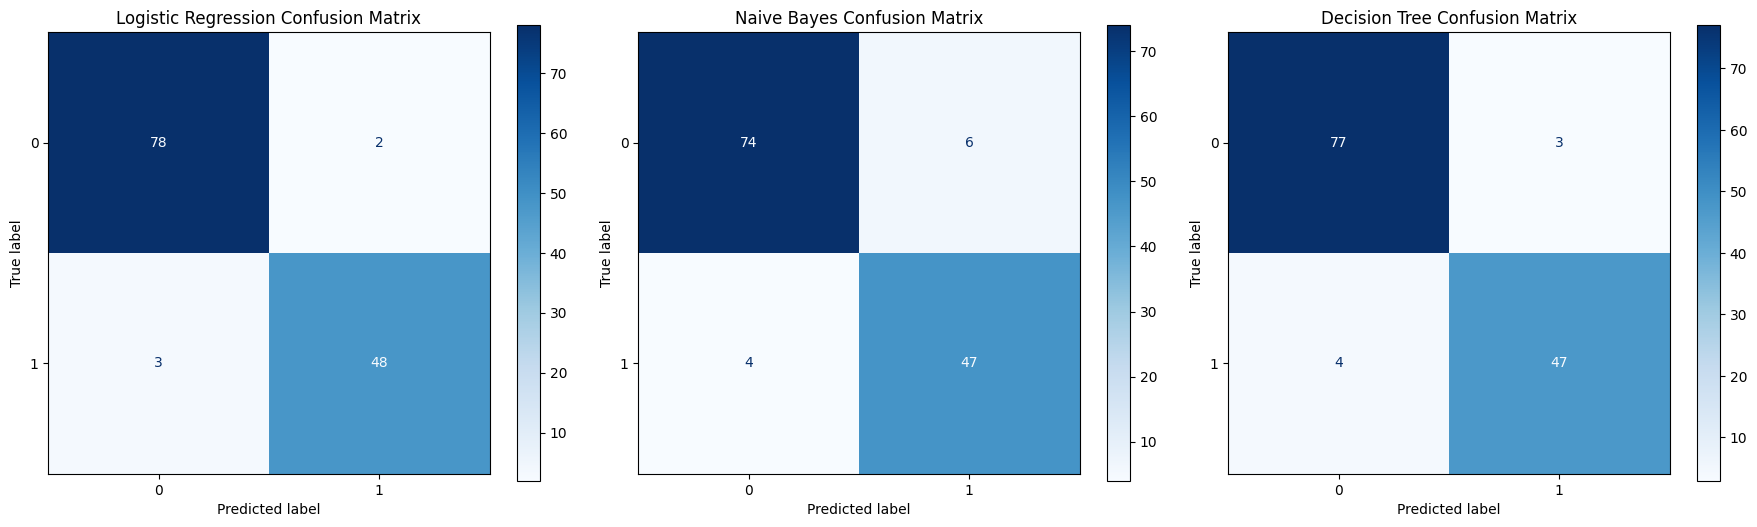

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Set up plotting for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Logistic Regression Confusion Matrix
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_logreg)
disp_logreg.plot(cmap="Blues", ax=axes[0])
axes[0].set_title("Logistic Regression Confusion Matrix")

# Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot(cmap="Blues", ax=axes[1])
axes[1].set_title("Naive Bayes Confusion Matrix")

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt)
disp_dt.plot(cmap="Blues", ax=axes[2])
axes[2].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()



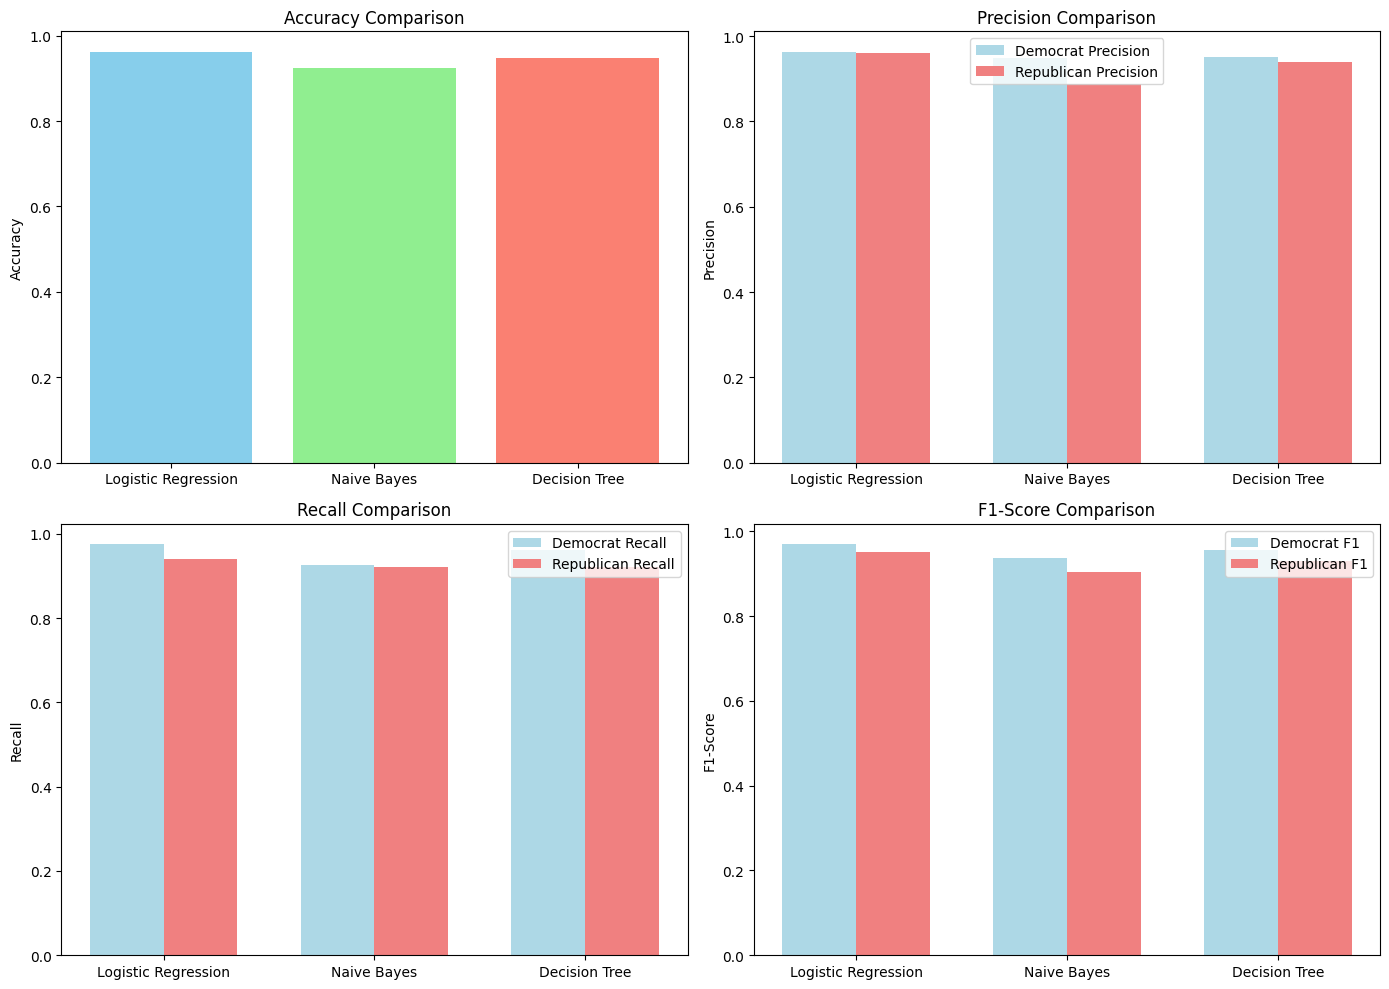

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for comparison
models = ['Logistic Regression', 'Naive Bayes', 'Decision Tree']
accuracies = [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_dt)]
precision_0 = [classification_report(y_test, y_pred_logreg, output_dict=True)['0']['precision'],
               classification_report(y_test, y_pred_nb, output_dict=True)['0']['precision'],
               classification_report(y_test, y_pred_dt, output_dict=True)['0']['precision']]
precision_1 = [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['precision'],
               classification_report(y_test, y_pred_nb, output_dict=True)['1']['precision'],
               classification_report(y_test, y_pred_dt, output_dict=True)['1']['precision']]
recall_0 = [classification_report(y_test, y_pred_logreg, output_dict=True)['0']['recall'],
            classification_report(y_test, y_pred_nb, output_dict=True)['0']['recall'],
            classification_report(y_test, y_pred_dt, output_dict=True)['0']['recall']]
recall_1 = [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['recall'],
            classification_report(y_test, y_pred_nb, output_dict=True)['1']['recall'],
            classification_report(y_test, y_pred_dt, output_dict=True)['1']['recall']]
f1_0 = [classification_report(y_test, y_pred_logreg, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['0']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['0']['f1-score']]
f1_1 = [classification_report(y_test, y_pred_logreg, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_nb, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_dt, output_dict=True)['1']['f1-score']]

# Plot comparison
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Comparison
ax[0, 0].bar(models, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
ax[0, 0].set_title("Accuracy Comparison")
ax[0, 0].set_ylabel("Accuracy")

# Precision Comparison for both classes
x = np.arange(len(models))
width = 0.35
ax[0, 1].bar(x - width/2, precision_0, width, label='Democrat Precision', color='lightblue')
ax[0, 1].bar(x + width/2, precision_1, width, label='Republican Precision', color='lightcoral')
ax[0, 1].set_title("Precision Comparison")
ax[0, 1].set_ylabel("Precision")
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(models)
ax[0, 1].legend()

# Recall Comparison for both classes
ax[1, 0].bar(x - width/2, recall_0, width, label='Democrat Recall', color='lightblue')
ax[1, 0].bar(x + width/2, recall_1, width, label='Republican Recall', color='lightcoral')
ax[1, 0].set_title("Recall Comparison")
ax[1, 0].set_ylabel("Recall")
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(models)
ax[1, 0].legend()

# F1-score Comparison for both classes
ax[1, 1].bar(x - width/2, f1_0, width, label='Democrat F1', color='lightblue')
ax[1, 1].bar(x + width/2, f1_1, width, label='Republican F1', color='lightcoral')
ax[1, 1].set_title("F1-Score Comparison")
ax[1, 1].set_ylabel("F1-Score")
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(models)
ax[1, 1].legend()

plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Initialize cross-validation strategy (StratifiedKFold ensures balanced splits)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Example for Logistic Regression
logreg_scores = cross_val_score(LogisticRegression(max_iter=1000), X, y, cv=cv, scoring='accuracy')
print("Logistic Regression Cross-Validation Scores:", logreg_scores)
print("Mean Accuracy:", logreg_scores.mean())

# You can repeat this for Naive Bayes and Decision Tree
naive_bayes_scores = cross_val_score(CategoricalNB(), X, y, cv=cv, scoring='accuracy')
decision_tree_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=cv, scoring='accuracy')

# Print mean accuracy for each
print("Naive Bayes Cross-Validation Mean Accuracy:", naive_bayes_scores.mean())
print("Decision Tree Cross-Validation Mean Accuracy:", decision_tree_scores.mean())


Logistic Regression Cross-Validation Scores: [0.97701149 0.95402299 0.90804598 1.         0.94252874]
Mean Accuracy: 0.9563218390804596
Naive Bayes Cross-Validation Mean Accuracy: 0.9011494252873563
Decision Tree Cross-Validation Mean Accuracy: 0.9379310344827585
